# Сегментация пользователей банка

**Цель:** Уменьшить отток клиентов путем маркетинговых воздействий на, наиболее предрасположенные к этому, сегменты.

**Задача:** Провести анализ клиентов банка и сегментировать их с акцентом на отток.

**Описание данных:**   
Датасет содержит данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.     
```userid``` — идентификатор пользователя,  
```score``` — баллы кредитного скоринга,  
```city``` — город,  
```gender``` — пол,  
```age``` — возраст,  
```equity``` — приблизительная оценка собственности клиента,  
```balance``` — баланс на счёте,  
```products``` — количество продуктов, которыми пользуется клиент,  
```credit_card``` — есть ли кредитная карта,  
```last_activity``` — был ли клиент активен последнее время,  
```est_salary``` — оценочная заработная плата клиента,  
```churn``` — ушёл или нет.  

**Ход исследования:**
1. Загрузка данных и изучение общей информации
2. Предобработка данных
3. Исследовательский анализ данных
   - Составить типичный портрет пользователя
   - Распределения параметров в разрезе оттока
   - Зависимости доли оттока от различных параметров
   - Уровень оттока по категориям
   - Корреляционный анализ: построить матрицу корреляции
4. Проверка гипотез:  

   1) Возраст клиентов, которые пользуются двумя продуктами банка, отличается от возраста клиентов, которые пользуются одним продуктом.   
   2) Средний балл кредитного скоринга женщин и мужчин отличается.
   
   
5. Промежуточный вывод о наиболее значимых показателях, связанных с оттоком
6. Сегментация клиентов на основе этих показателей
7. Общие выводы
8. Презентация. 

**Материалы:**
- [Презентация](https://drive.google.com/file/d/1EboRKCbKk5QHlZg74T03R_xzeGNWZnJG/view?usp=drive_link)
- [Дашборд](https://public.tableau.com/views/Dashboardforbank/Dashboardforbank?:language=en-US&:display_count=n&:origin=viz_share_link)

## Загрузка данных и изучение общей информации

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [3]:
try:
  data = pd.read_csv('datasets/bank_scrooge.csv')
except:
  data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


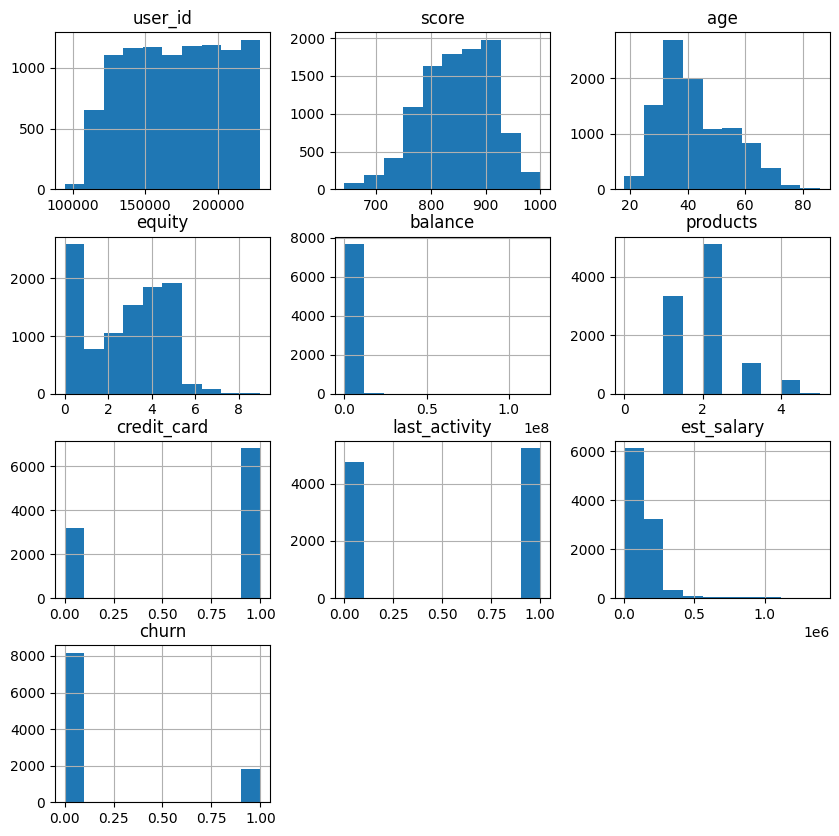

In [6]:
data.hist(figsize=(10,10));

In [7]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Датасет содержит 12 колонок, 10000 строк. В колонках balance и est_salary можно ожидать выбросы. В колонках balance и age содержатся пропуски. 

## Предобработка данных

### Анализ дубликатов

In [8]:
data.duplicated().sum()

0

In [9]:
data['user_id'].duplicated().sum()

73

In [10]:
data[['user_id', 'city', 'gender']].duplicated().sum()

0

Полных дубликатов нет, по столбцу user_id нашлось 73 дубликата, посмотрим на них:

In [11]:
data[data.duplicated(['user_id'], keep=False)].sort_values('user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Строки не являются дубликатами, оставим их как есть. Можно отметить, что записи с дублирующимися user_id относятся к разным городам, возможно это связано с техническими ошибками. 

In [12]:
data['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [13]:
data['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

### Анализ пропусков

In [14]:
data.isna().mean()

user_id          0.0000
score            0.0000
city             0.0000
gender           0.0000
age              0.0026
equity           0.0000
balance          0.2295
products         0.0000
credit_card      0.0000
last_activity    0.0000
est_salary       0.0000
churn            0.0000
dtype: float64

Пропусков в столбце age мало - 0.3%, можно удалить эти строчки. В столбце balance 23% пропусков, необходимо изучить их природу.

In [15]:
data.dropna(subset=['age'], inplace=True)

In [16]:
data[data['balance'].isna()].head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
21,177415,896.0,Рыбинск,Ж,47.0,0,NaN,1,0,0,225060.35,0
30,155730,946.0,Ярославль,Ж,47.0,0,NaN,2,1,1,660015.85,0
34,205226,944.0,Ярославль,М,35.0,0,NaN,2,1,1,239843.39,0
39,173175,924.0,Рыбинск,Ж,51.0,0,NaN,1,1,1,248844.47,0
43,228585,956.0,Ростов,М,41.0,0,NaN,1,1,0,115117.10,0


In [17]:
data['balance'].min()

0.0

Отрицательных значений в столбце balance нет. Значит есть основания полагать, что значения в этом столбце могут быть не связаны с балансом кредитных карт. 

In [18]:
data[data['balance'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


Есть нулевые значения в датасете, хотя их только 2. Нельзя сказать, что пропуски это нулевые значения.

In [19]:
data[data['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


In [20]:
data.dropna().describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7695.000000,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000
mean,171710.892268,843.744120,42.924366,3.394802,8.272456e+05,2.081222,0.640156,0.515140,1.245204e+05,0.234698
std,33812.862444,55.342539,12.244010,1.584817,1.980327e+06,0.757446,0.479986,0.499803,1.046671e+05,0.423837
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142638.000000,801.000000,33.000000,2.000000,2.956987e+05,2.000000,0.000000,0.000000,6.755698e+04,0.000000
50%,172710.000000,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.000000,1.000000,1.062502e+05,0.000000
75%,201145.500000,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.000000,1.000000,1.551446e+05,0.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Посмотрим отличия в датасетах с пропусками и без:

|Показатели|в датасете с пропусками|в датасете без пропусков|
|--|--|--|
|Средний балл скоринга|865|844|
|Средний возраст|42|43|
|Медианная оценка собственности|0|4|
|Медианное количество продуктов|1 (максимальное 3)|2 (максимальное 5)|
|% кредитных карт|82|64|
|% активных пользователей|55|52|
|Медианная заработная плата|174 тыс|106 тыс|
|% оттока|0.6|23|

Исходя из полученных результатов можно утвержать, что пропуски не связаны с отточными клиентами. Наоборот отток клиентов, у которых отсутствуют значения баланса, низкий. Явной взаимосвязи пропусков с какими-либо показателями нет. Можно предположить, что значения balance отражают баланс на дебетовых картах, а пропуски связаны с их отсутствием. В пользу этого предположения говорит большая доля кредитных карт и меньшее количество продуктов при этом (то есть один продукт - кредитная карта), для других 18% пользователей таким продуктом(продуктами) могут быть также иные продукты, чем дебетовая карта.  
В связи с отсутствием явных взаимосвязей между пропусками и другими параметрами, пропуски нельзя искусственно заполнить, поэтому оставим их.

### Типы данных

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


In [22]:
data['age'] = data['age'].astype('int')

In [23]:
data['score'] = data['score'].astype('int')

### Анализ аномалий

In [24]:
data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


In [25]:
data = data[data['products'] > 0]

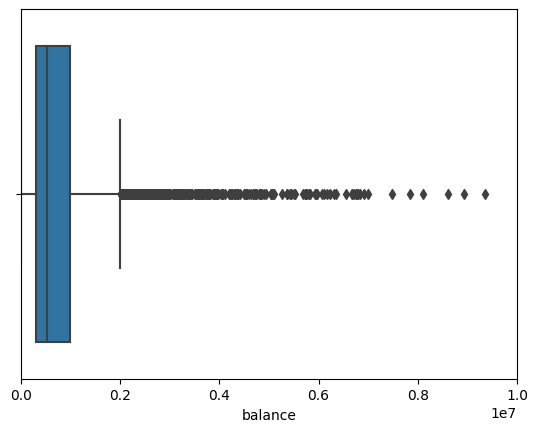

In [26]:
sns.boxplot(data=data, x='balance')
plt.xlim(0, 10000000);

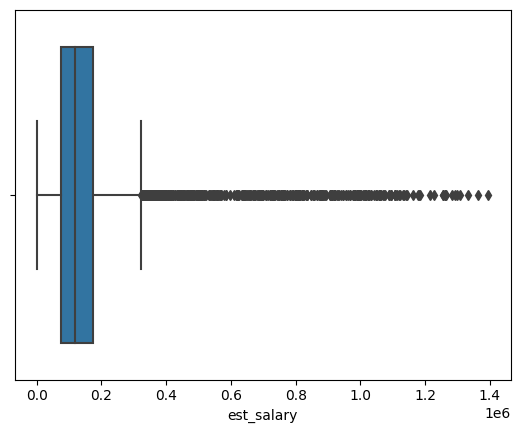

In [27]:
sns.boxplot(data=data, x='est_salary');

In [28]:
np.percentile(data.dropna()['balance'], [90, 95])

array([1460133.708, 2114078.394])

In [29]:
np.percentile(data['est_salary'], [90, 95])

array([242322.348, 316366.936])

In [30]:
# выделим часть датасета с аномльными значениями balance и est_salary в отдельный 
vip = data[
    (data['balance'] >= np.percentile(data.dropna()['balance'], 95)) | 
    (data['est_salary'] >= np.percentile(data['est_salary'], 95))
]
vip

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0
30,155730,946,Ярославль,Ж,47,0,NaN,2,1,1,660015.85,0
44,210313,935,Ярославль,М,41,5,3781118.22,2,1,0,761349.20,0
59,227642,930,Ярославль,Ж,36,0,NaN,2,1,0,359081.73,0
63,140749,948,Ярославль,Ж,34,5,3134788.66,2,0,0,199705.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9911,163071,961,Ярославль,М,38,5,2298650.66,4,1,0,247334.13,0
9926,117588,852,Ярославль,М,39,4,2357977.58,2,0,0,213535.23,0
9963,187204,957,Ярославль,М,35,4,3431029.03,4,1,0,354987.43,1
9964,148232,968,Ярославль,Ж,32,0,NaN,1,1,0,520631.22,0


In [31]:
df = data[~data.index.isin(vip.index)]
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


## Исследовательский анализ

### Типичный портрет пользователя

In [32]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9209.000000,9209.000000,9209.000000,9209.000000,7.240000e+03,9209.000000,9209.000000,9209.000000,9209.000000,9209.000000
mean,171683.269410,844.831469,42.662070,2.637963,6.185723e+05,1.868064,0.685308,0.521012,120817.959224,0.173743
std,33614.262239,62.992231,12.268997,1.956548,4.402179e+05,0.778366,0.464418,0.499585,63298.306709,0.378909
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2546.300000,0.000000
25%,142637.000000,800.000000,33.000000,1.000000,2.864834e+05,1.000000,0.000000,0.000000,71999.440000,0.000000
50%,172659.000000,848.000000,40.000000,3.000000,4.893640e+05,2.000000,1.000000,1.000000,113187.090000,0.000000
75%,201128.000000,894.000000,51.000000,4.000000,8.770187e+05,2.000000,1.000000,1.000000,161605.460000,0.000000
max,229145.000000,999.000000,86.000000,9.000000,2.112503e+06,5.000000,1.000000,1.000000,316316.100000,1.000000


In [33]:
df['city'].value_counts(normalize=True)

Ярославль    0.577044
Рыбинск      0.273645
Ростов       0.149310
Name: city, dtype: float64

In [34]:
df['gender'].value_counts(normalize=True)

Ж    0.508741
М    0.491259
Name: gender, dtype: float64

58% клиентов банка обслуживаются в Ярославле, 27% и 15% в Рыбинске и Ростове, соответственно. Женщин и мужчин примерно равное количество. Средний возраст клиентов - 40 лет. В среднем клиенты пользуются двумя продуктами банка. 69% клиентов имеют кредитную карту. Чуть больше половины клиентов были активны в последнее время.  
В среднем клиент имеет на счете около 490 тыс, оценочную заработную плату - 113 тыс, оценку собственности - 3, 845 баллов кредитного скоринга.

### Распределения параметров в разрезе оттока

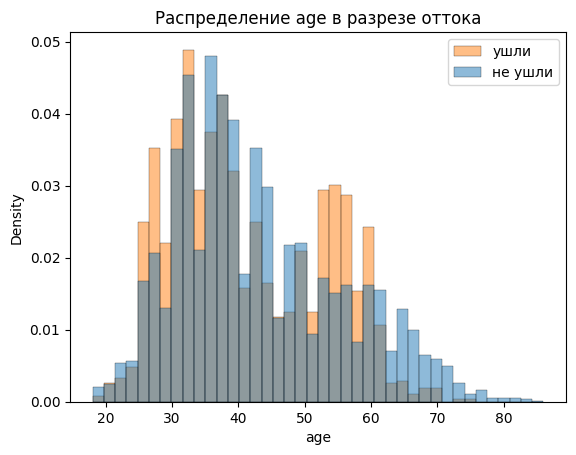

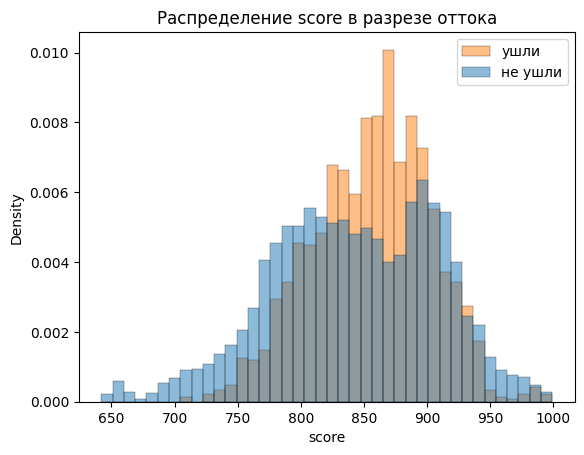

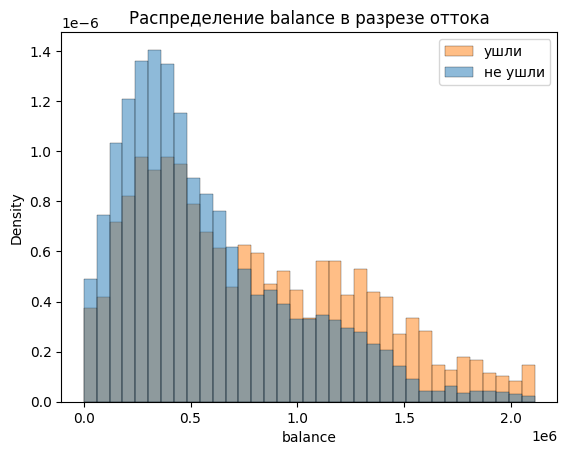

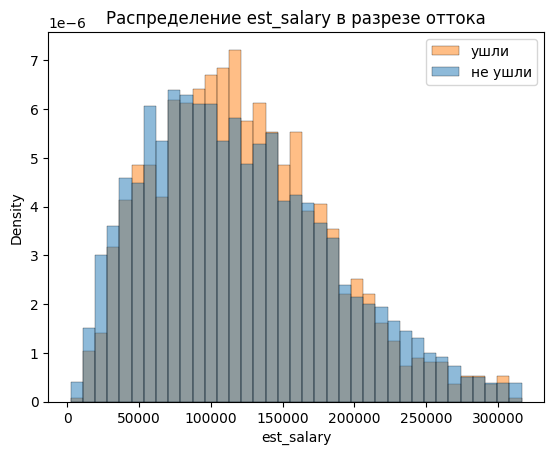

In [35]:
for value in ['age', 'score', 'balance', 'est_salary']:
    sns.histplot(df, x=value, hue='churn', stat='density', common_norm=False, linewidth=0.2)
    plt.title(f'Распределение {value} в разрезе оттока')
    plt.legend(['ушли', 'не ушли'], title='')
    plt.show()

По формам распределения можно заметить, что отток преобладает:
- в возрасте 25-35 и 50-60 лет; 
- в области 825-900 баллов скоринга;
- в области более высокого баланса (от 750000);
- при заработной плате около 100000-170000. 

Посмотрим распределения параметров в разрезе оттока **в vip-сегменте**:

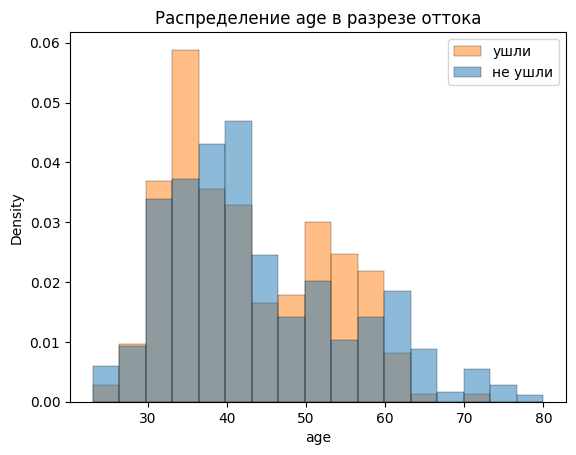

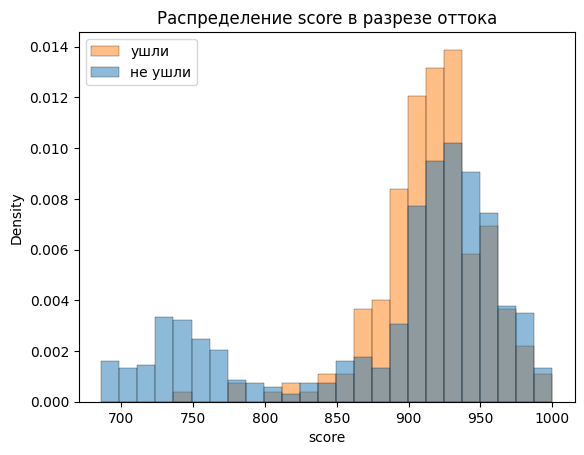

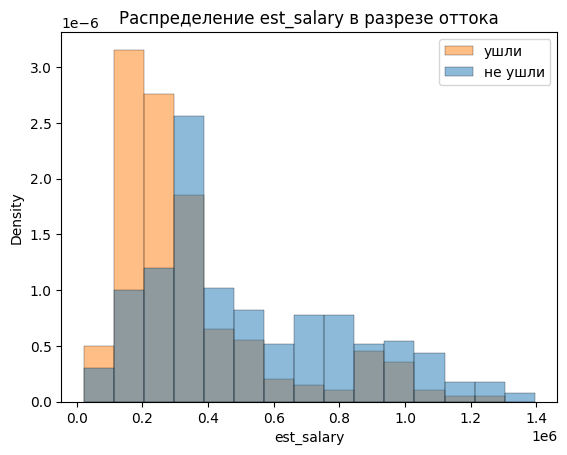

In [36]:
for value in ['age', 'score', 'est_salary']:
    sns.histplot(vip, x=value, hue='churn', stat='density', common_norm=False, linewidth=0.2)
    plt.title(f'Распределение {value} в разрезе оттока')
    plt.legend(['ушли', 'не ушли'], title='')
    plt.show()

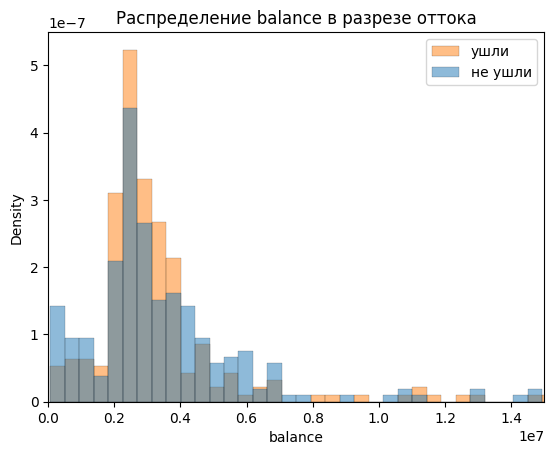

In [37]:
sns.histplot(vip, x='balance', hue='churn', stat='density', common_norm=False)
plt.title(f'Распределение balance в разрезе оттока')
plt.legend(['ушли', 'не ушли'], title='')
plt.xlim(0, 15000000)
plt.show()

В vip-сегменте возраст основной части пользователей от 30 лет; большая часть пользователей имеют скоринговые баллы от 850. Отток преобладает:
- в возрасте 30-35 и 50-60 лет; 
- при скоринговых баллах от 860 до 940; 
- при заработной плате до 300000; 
- при балансе от 2 до 4 млн. 

### Зависимость доли оттока от различных параметров

In [38]:
df['churn'].mean()

0.17374307742425887

% оттока по банку, не включая vip сегмент, 17.4%

In [39]:
def make_relation(df, column, scope, title, xlabel):
    # функция делит непрерывную величину, указанную в column, на диапазоны, указанные в scope
    # строит долю оттока по этим диапазонам
    df['group'] = pd.cut(df[column], scope)
    display(df.groupby('group')['churn'].agg(['count', 'mean']).round(3))
    
    df.groupby('group')['churn'].mean().plot(rot=45, ylim=0, figsize=(7,5))
    
    plt.title(title)
    plt.ylabel('доля оттока')
    plt.xlabel(xlabel)
    plt.axhline(y=df['churn'].mean(), color='red', linestyle='--')
    plt.show();

,count,mean
group,,
"(640, 740]",480,0.021
"(740, 760]",322,0.090
"(760, 780]",661,0.080
"(780, 800]",853,0.141
"(800, 820]",953,0.157
"(820, 840]",1007,0.211
"(840, 860]",952,0.251
"(860, 880]",929,0.294
"(880, 900]",1144,0.218


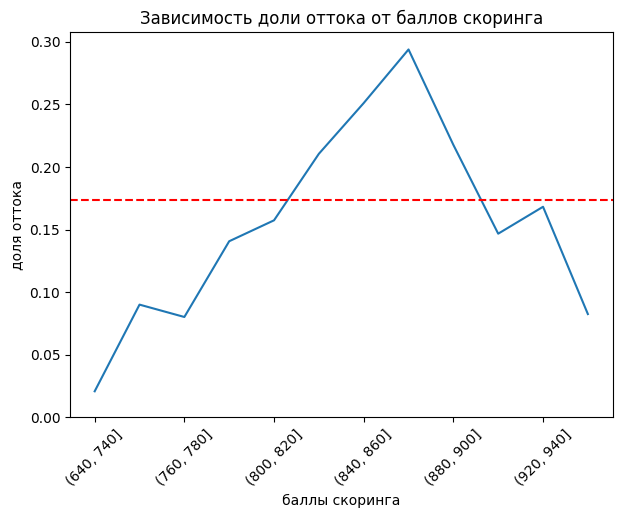

In [40]:
make_relation(df, 'score', [640, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 1000],
             'Зависимость доли оттока от баллов скоринга', 'баллы скоринга')

Зависимость доли оттока от баллов скоринга проходит через максимум около 860-880 баллов, при этом отток достигает почти 30%. Для низких (до 800) и высоких (более 900) баллов доля оттока ниже среднего.

,count,mean
group,,
"(0.0, 250000.0]",1468,0.158
"(250000.0, 500000.0]",2205,0.172
"(500000.0, 750000.0]",1292,0.191
"(750000.0, 1000000.0]",818,0.263
"(1000000.0, 1250000.0]",659,0.288
"(1250000.0, 1500000.0]",475,0.343
"(1500000.0, inf]",321,0.517


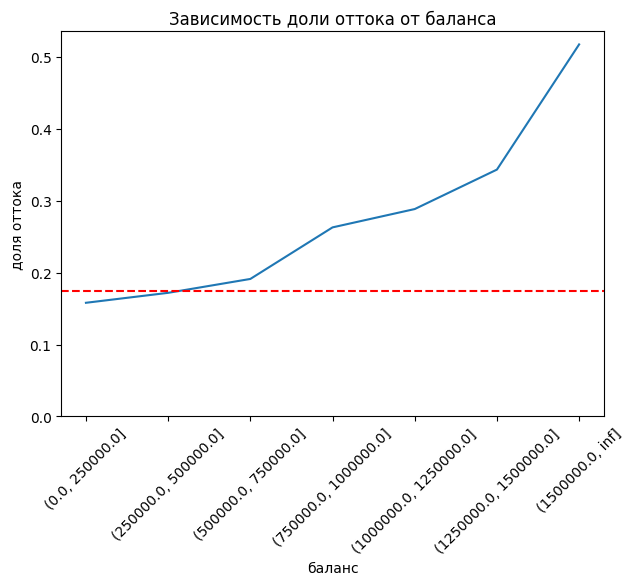

In [41]:
make_relation(df, 'balance', [0, 250000, 500000, 750000, 1000000, 1250000, 1500000, np.inf],
             'Зависимость доли оттока от баланса', 'баланс')

С ростом баланса на счете сильно растет доля оттока. 

,count,mean
group,,
"(2000.0, 30000.0]",423,0.109
"(30000.0, 60000.0]",1266,0.159
"(60000.0, 90000.0]",1637,0.167
"(90000.0, 120000.0]",1659,0.194
"(120000.0, 150000.0]",1454,0.188
"(150000.0, 180000.0]",1143,0.195
"(180000.0, 210000.0]",710,0.182
"(210000.0, inf]",917,0.143


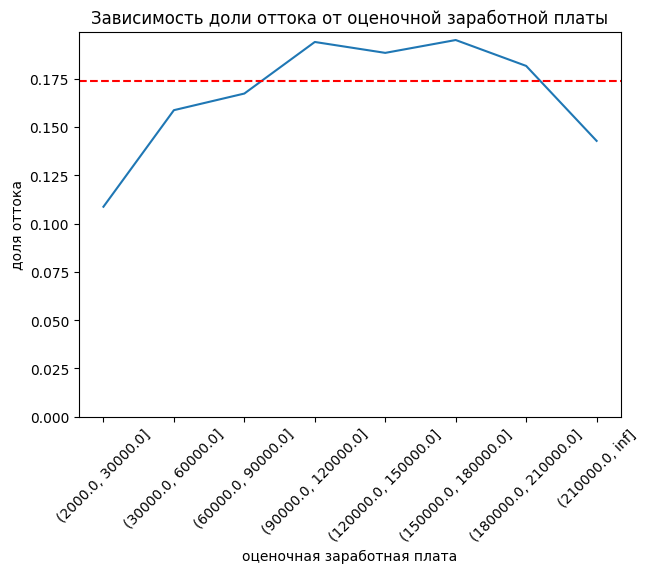

In [42]:
make_relation(df, 'est_salary', [2000, 30000, 60000, 90000, 120000, 150000, 180000, 210000, np.inf],
              'Зависимость доли оттока от оценочной заработной платы', 'оценочная заработная плата')

При низкой и высокой оценочной заработной плате доля оттока снижается, а при заработной плате от 90000 до 210000 доля оттока выше среднего, примерно находится на одном уровне. 

,count,mean
group,,
"(18.0, 25.0]",354,0.169
"(25.0, 30.0]",1004,0.241
"(30.0, 35.0]",1720,0.191
"(35.0, 40.0]",1638,0.152
"(40.0, 45.0]",1227,0.127
"(45.0, 50.0]",840,0.146
"(50.0, 55.0]",735,0.267
"(55.0, 60.0]",714,0.261
"(60.0, 65.0]",503,0.087


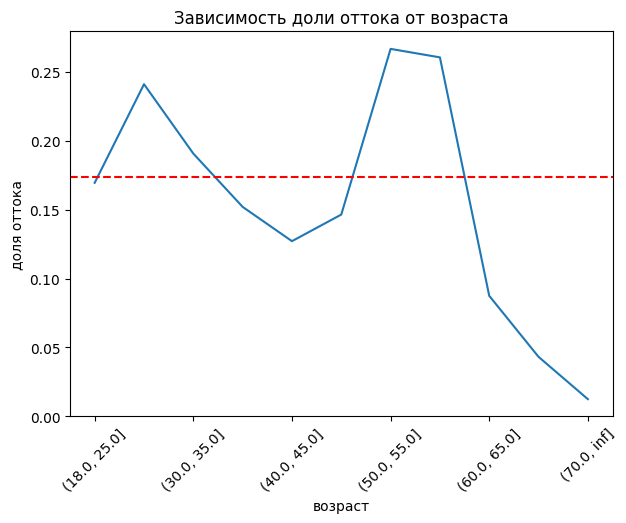

In [43]:
make_relation(df, 'age', [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, np.inf],
             'Зависимость доли оттока от возраста', 'возраст')

Доля оттока максимальна для пользователей 50-60, достигает более 25%. Также рост оттока наблюдается для пользователей 25-35 лет.

### Уровень оттока по категориям

In [44]:
def create_graph(column, title, xlabel, df=df):
    # функция создает график уровня оттока по категориям из column
    display(df.groupby(column)['churn'].agg(['count','mean']).round(3))
    
    df.groupby(column)['churn'].mean().plot(kind='bar', rot=0, figsize=(7,5))
    
    plt.axhline(y=df['churn'].mean(), color='red', linestyle='--')
    plt.ylabel('доля оттока')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show();

,count,mean
city,,
Ростов,1375,0.180
Рыбинск,2520,0.156
Ярославль,5314,0.181


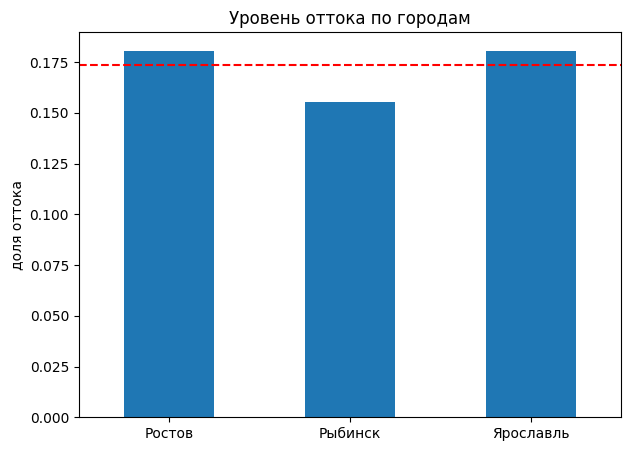

In [45]:
create_graph('city', 'Уровень оттока по городам', '')

Уровень оттока в Ярославле и Ростове практически одинаков, незначительно выше среднего.

,count,mean
gender,,
Ж,4685,0.124
М,4524,0.225


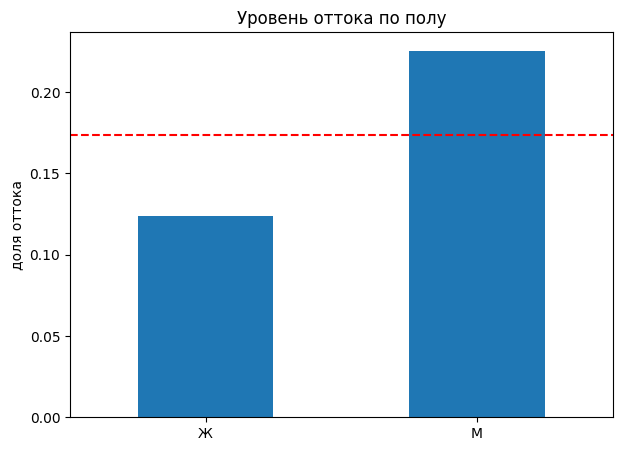

In [46]:
create_graph('gender', 'Уровень оттока по полу', '')

Уровень оттока мужчин значительно выше, чем женщин, выше 20%. 

,count,mean
equity,,
0,2276,0.037
1,754,0.122
2,1030,0.153
3,1475,0.198
4,1707,0.231
5,1720,0.284
6,144,0.326
7,75,0.427
8,15,0.333


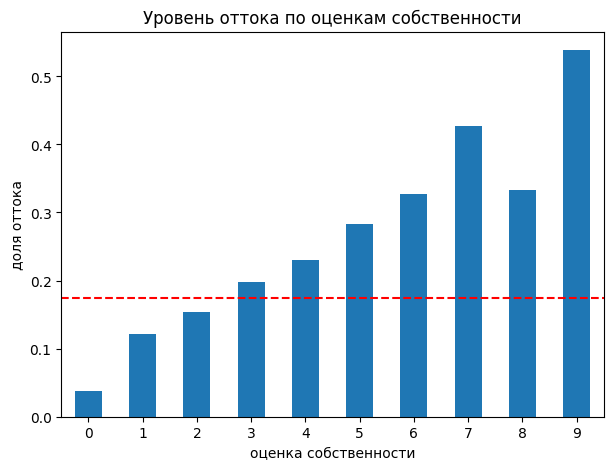

In [47]:
create_graph('equity', 'Уровень оттока по оценкам собственности', 'оценка собственности')

Уровень оттока возрастает с увеличением оценки собственности, становится выше среднего при оценке собственности от 3 и выше.

,count,mean
products,,
1,3020,0.073
2,4822,0.181
3,948,0.270
4,400,0.602
5,19,0.421


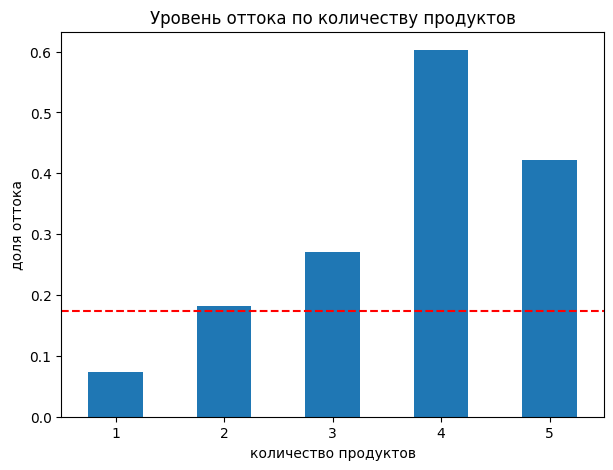

In [48]:
create_graph('products', 'Уровень оттока по количеству продуктов', 'количество продуктов')

Уровень оттока клиентов, использующих 1 продукт банка, - меньше 10%; 2 продукта - чуть выше среднего, остальных - значительно выше.

,count,mean
credit_card,,
0,2898,0.237
1,6311,0.145


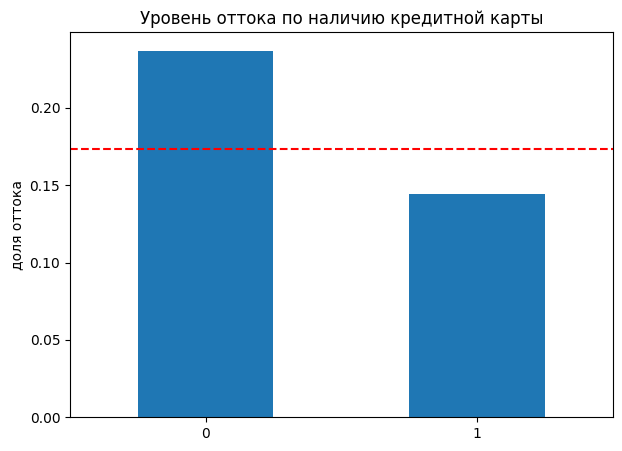

In [49]:
create_graph('credit_card', 'Уровень оттока по наличию кредитной карты', '')

Уровень оттока клиентов, имеющих кредитную карту, ниже 15%; не имеющих кредитную карту выше 20%. 

,count,mean
last_activity,,
0,4411,0.109
1,4798,0.233


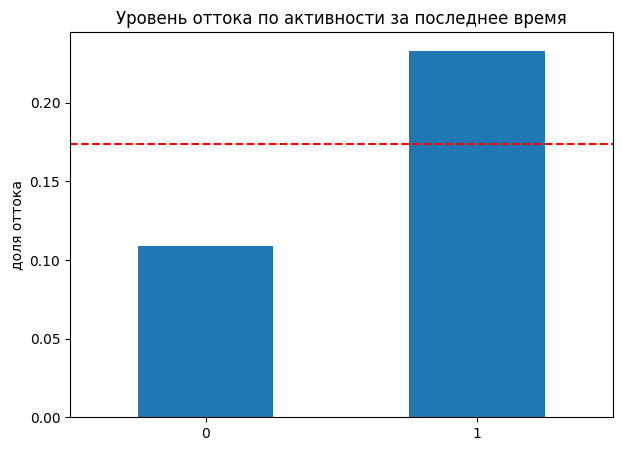

In [50]:
create_graph('last_activity', 'Уровень оттока по активности за последнее время', '')

Активные в последнее время клиенты уходят чаще, уровень оттока больше 20%. 

#### Уровень оттока по категориям в vip-сегменте

,count,mean
city,,
Ростов,41,0.415
Рыбинск,162,0.272
Ярославль,561,0.280


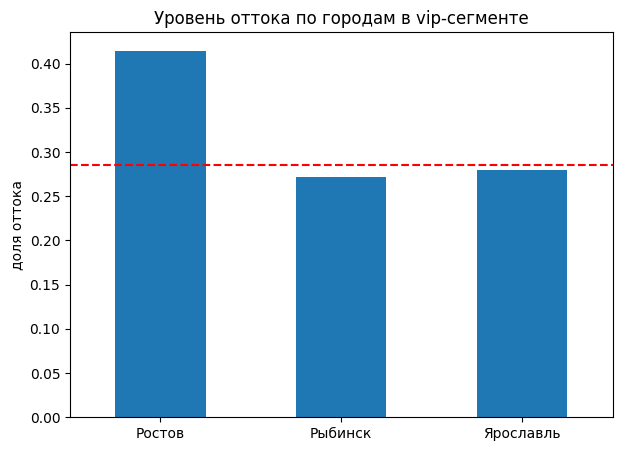

In [51]:
create_graph('city', 'Уровень оттока по городам в vip-сегменте', '', df=vip)

,count,mean
gender,,
Ж,297,0.185
М,467,0.349


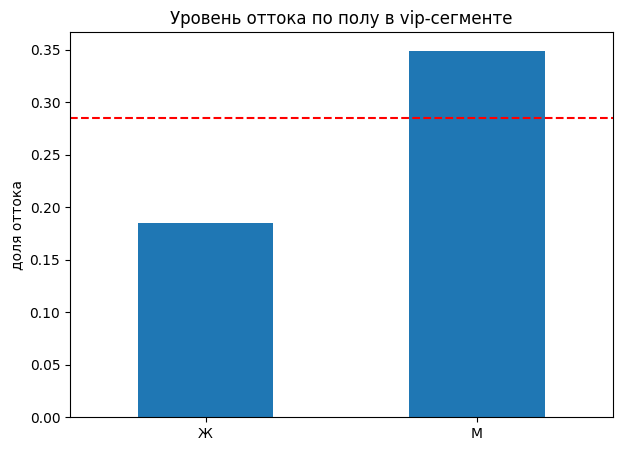

In [52]:
create_graph('gender', 'Уровень оттока по полу в vip-сегменте', '', df=vip)

,count,mean
equity,,
0,300,0.017
1,19,0.053
2,21,0.381
3,65,0.446
4,140,0.500
5,195,0.451
6,17,0.647
7,5,1.000
8,2,0.500


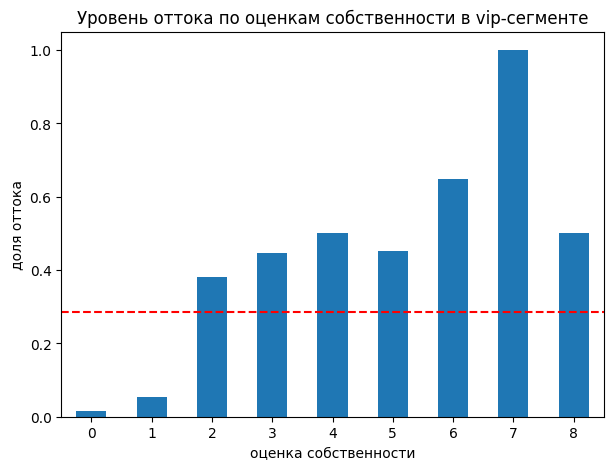

In [53]:
create_graph(
    'equity', 
    'Уровень оттока по оценкам собственности в vip-сегменте', 
    'оценка собственности', 
    df=vip
)

,count,mean
products,,
1,303,0.046
2,297,0.350
3,90,0.456
4,74,0.797


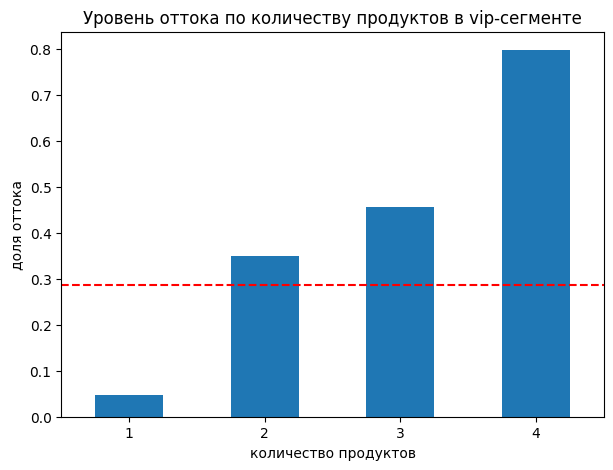

In [54]:
create_graph(
    'products', 
    'Уровень оттока по количеству продуктов в vip-сегменте', 
    'количество продуктов', 
    df=vip
)

,count,mean
credit_card,,
0,291,0.44
1,473,0.19


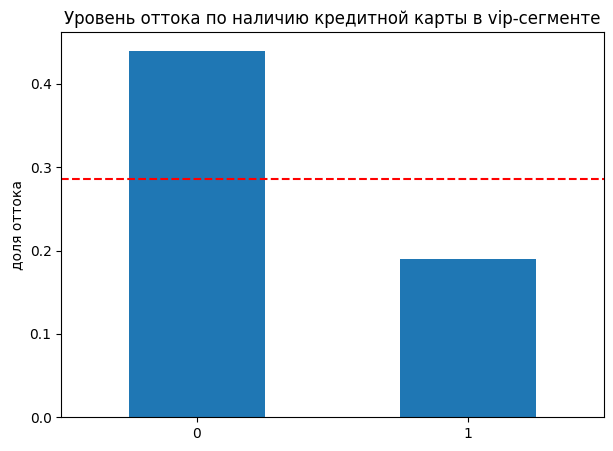

In [55]:
create_graph(
    'credit_card', 
    'Уровень оттока по наличию кредитной карты в vip-сегменте', 
    '', 
    df=vip
)

,count,mean
last_activity,,
0,347,0.173
1,417,0.379


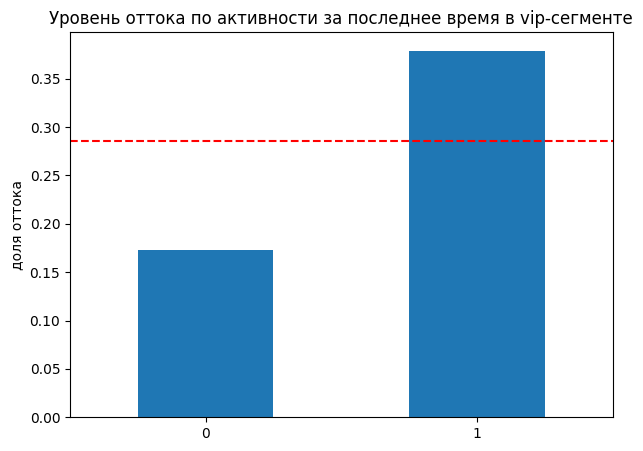

In [56]:
create_graph(
    'last_activity', 
    'Уровень оттока по активности за последнее время в vip-сегменте', 
    '', 
    df=vip
)

В vip-сегменте наиболее высокий отток:
- в Ростове - 42%; 
- среди мужчин - 35%; 
- при оценках собственности от 2 и выше - выше 38%
- при количестве используемых продуктов от 2 и более - выше 35%;
- при отсутствии кредитной карты - 44%;
- активных в последнее время пользователей - 40%.

### Корреляционный анализ

In [57]:
df_corr = pd.get_dummies(df, columns=['city', 'gender']).corr()

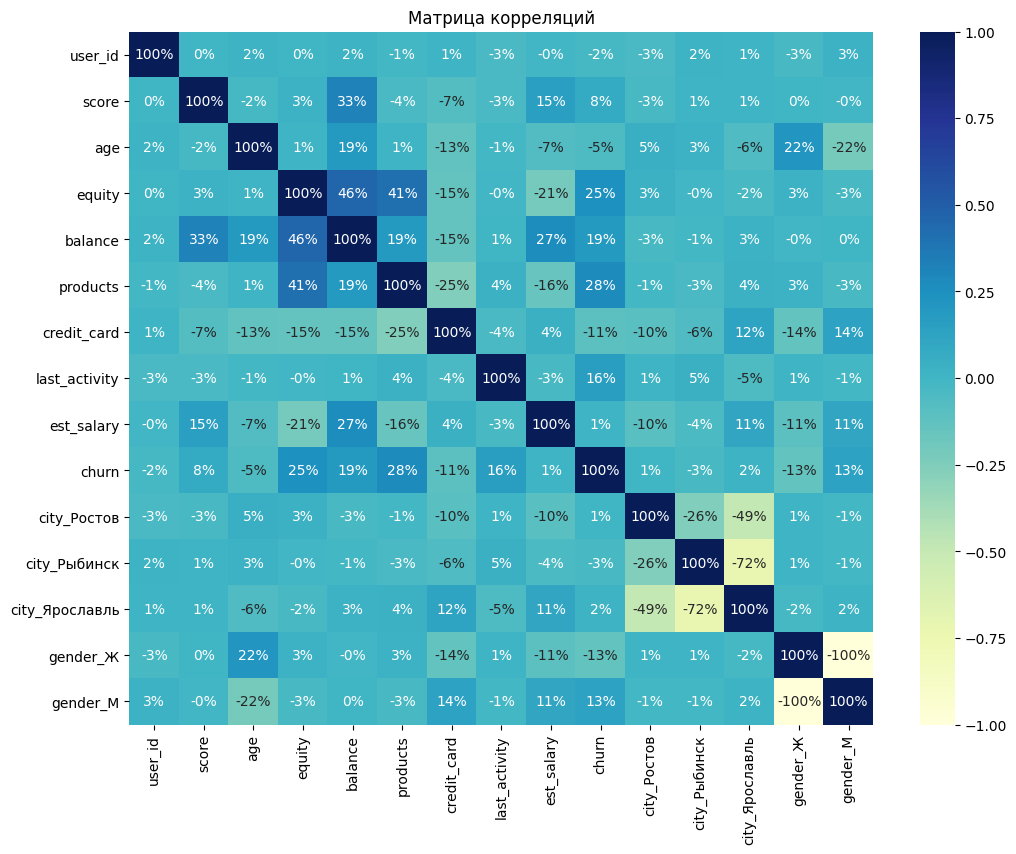

In [58]:
plt.figure(figsize=(12,9))
sns.heatmap(df_corr, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Матрица корреляций');

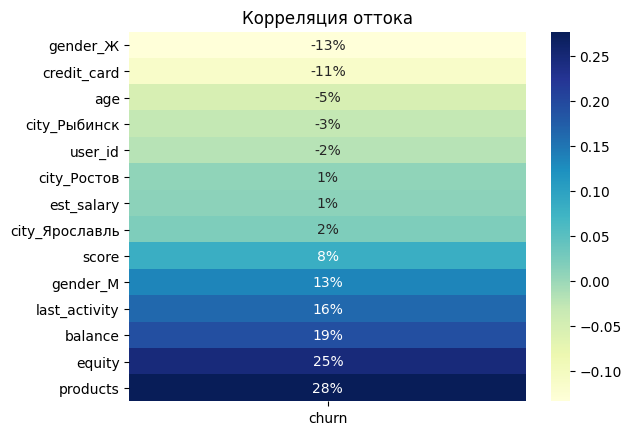

In [59]:
plt.figure()
sns.heatmap(
    df_corr.loc[:, ['churn']].drop('churn').sort_values('churn'),
    annot=True, 
    fmt='.0%', 
    cmap='YlGnBu')
plt.title('Корреляция оттока');

Отток слабо коррелирует с количеством продуктов банка, оценкой собственности, балансом, активностью за последнее время, полом, отсутствием кредитной карты.

## Проверка гипотез

H0 - Возраст клиентов, которые пользуются двумя продуктами банка, равен возрасту клиентов, которые пользуются одним продуктом.  
H1 - Возраст клиентов, которые пользуются двумя продуктами банка, отличается от возраста клиентов, которые пользуются одним продуктом.  

Уровень статистической значимости - 0.05%.  
Для проверки гипотез, так как необходимо сравненить средние значения, используем t-test. Поскольку выборки большого размера, требование нормальности распределения выборочных средних будет соблюдаться согласно ЦПТ. 

In [60]:
one_product = data[data['products'] == 1]['age']
two_products = data[data['products'] == 2]['age']

In [61]:
alpha = 0.05

results = stat.ttest_ind(one_product, two_products, equal_var=False)

print(f'p-value {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимое отличие')
else:
    print('Не удалось отвергнуть нулевую гипотезу: отличие статистически незначимо')

p-value 0.03299080704232691
Отвергаем нулевую гипотезу: есть статистически значимое отличие


Можно сделать вывод о различии в возрасте пользователей, пользующихся одним продуктом и двумя.

Теперь проверим гипотезу о различии средних скоринговых баллов у мужчин и женщин

Н0 - Скоринговые баллы мужчин и женщин равны  
Н1 - Скоринговые баллы мужчин и женщин различаются

In [62]:
sample_m = df[df['gender'] == 'М']['score']
sample_w = df[df['gender'] == 'Ж']['score']

In [63]:
alpha = 0.05

results = stat.ttest_ind(sample_m, sample_w, equal_var=False)

print(f'p-value {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть статистически значимое отличие')
else:
    print('Не удалось отвергнуть нулевую гипотезу: отличие статистически незначимо')

p-value 0.7936157670799242
Не удалось отвергнуть нулевую гипотезу: отличие статистически незначимо


Отличие средних скоринговых баллов у мужчин и женщин статистически незначимо.

## Промежуточный вывод: Наиболее значимые показатели, связанные с оттоком

Больше всего оттекают пользователи:
- мужчины
- 25-35 и 50-60 лет
- имеющие 820-900 баллов скоринга
- имеющие на балансе более 500000
- пользующиеся тремя и более продуктами
- с оценкой собственности 3 и более
- не имеющие кредитной карты
- активные в последнее время

С учетом корреляции и зависимости доли оттока от различных показателей, можно сделать вывод, что на отток больше всего влияют количество продуктов банка, оценка собственности, баланс. Также значимыми показателями являются пол, активность за последнее время, наличие кредитной карты.  

## Сегментация

In [64]:
seg_equity_product = df[(df['equity'] >= 3) & (df['products'] >= 3)]
seg_men_balance = df[(df['gender'] == 'М') & (df['balance'] >= 500000)]
seg_active_score = df[(df['score'] >= 820) & (df['score'] <= 900) & (df['last_activity'] == 1)]
seg_no_card_product2 = df[(df['credit_card'] == 0) & (df['products'] == 2)]
seg_high_score = df[df['score'] > 900]
seg_balance_products = df[(df['balance'] < 500000) & (df['products'] <= 2)]

In [65]:
names = ['VIP клиенты с высоким балансом и заработной платой', 
         'Клиенты, пользующиеся 3 и более продуктами банка и имеющие оценку собственности от 3 и выше', 
         'Мужчины с балансом на счете от 500 тыс', 
         'Активные в последнее время клиенты с баллами скоринга от 820 до 900', 
         'Клиенты, не имеющие кредитной карты и пользующиеся 2 продуктами банка', 
         'Клиенты с баллами скоринга выше 900', 
         'Клиенты с балансом ниже 500 тыс, пользующиеся 1 или 2 продуктами банка']
size = []
churn = []
for value in [vip, seg_equity_product, seg_men_balance, seg_active_score,
             seg_no_card_product2, seg_high_score, seg_balance_products]:  
    churn.append("{:.1%}".format(value['churn'].mean()))
    size.append(len(value))
 
segments = pd.DataFrame(
    {
    'name' : names,    
    'churn' : churn, 
    'size' : size
    }
)   
pd.set_option('display.max_colwidth', None)
segments = segments.sort_values('churn', ascending=False).reset_index(drop=True)
segments

,name,churn,size
0,"Клиенты, пользующиеся 3 и более продуктами банка и имеющие оценку собственности от 3 и выше",39.5%,1074
1,Мужчины с балансом на счете от 500 тыс,36.6%,1691
2,Активные в последнее время клиенты с баллами скоринга от 820 до 900,36.0%,2058
3,VIP клиенты с высоким балансом и заработной платой,28.5%,764
4,"Клиенты, не имеющие кредитной карты и пользующиеся 2 продуктами банка",25.6%,1760
5,"Клиенты с балансом ниже 500 тыс, пользующиеся 1 или 2 продуктами банка",14.7%,3151
6,Клиенты с баллами скоринга выше 900,13.9%,1908


In [66]:
# Проверим охват пользователей
ids = pd.concat(
    [
        vip['user_id'],
        seg_men_balance['user_id'], 
        seg_active_score['user_id'], 
        seg_equity_product['user_id'], 
        seg_no_card_product2['user_id'],
        seg_high_score['user_id'],
        seg_balance_products['user_id']
    ], 
    axis=0, 
    ignore_index=True
)

print(f'Охвачено {ids.nunique()} пользователей, что составляет {round(ids.nunique() / len(data) * 100)}%')

Охвачено 8643 пользователей, что составляет 87%


В результате сегментации охвачено 87% пользователей. Получено 7 сегментов.  

Топ-3 наиболее приоритетных сегмента с оттоком выше 36%:  
1) Клиенты, пользующиеся 3 и более продуктами банка и имеющие оценку собственности от 3 и выше;  
2) Мужчины с балансом на счете от 500 тыс;  
3) Активные в последнее время клиенты с баллами скоринга от 820 до 900.

## Общий вывод

Были изучены данные банка, в результате предобработки удалены пропуски в столбце age, заменены типы данных в столбцах age и score, часть датасета с аномально высокими значениями в столбцах est_salary и balance выделена в отдельный vip сегмент. Были обнаружены дублирующиеся user-id, относящиеся к разным городам. Проведен анализ пропусков в столбце balance.  

Проведен исследовательский анализ клиентов банка, по результатам которого было установлено:
- 58% клиентов банка обслуживаются в Ярославле, 27% и 15% в Рыбинске и Ростове, соответственно. 
- Женщин и мужчин примерно равное количество. 
- Средний возраст клиентов - 40 лет. 
- В среднем клиенты пользуются двумя продуктами банка. 
- 69% клиентов имеют кредитную карту. 
- Чуть больше половины клиентов были активны в последнее время.
- В среднем клиент имеет на счете около 490 тыс. 
- Средняя оценочная заработная плата - 113 тыс. 
- Средняя оценка собственности клиентов - 3. 
- В среднем клиент имеет 845 баллов кредитного скоринга.

По результатам исследования оттока удалось определить какие пользователи уходят чаще:
- В Ярославле и Ростове несколько чаще, чем в Рыбинске.
- 25-35 и 50-60 лет;
- имеющие 820-900 баллов скоринга;
- мужчины;
- имеющие от 500000 на балансе;
- использующие 3 и более продукта банка;
- с заработной платой около 100000-170000;
- не имеющие кредитной карты;
- активные в последнее время.  

Стоит отметить высокий отток пользователей с высокими значениями балансов и заработных плат, которые были выделены в отдельный vip-сегмент. В отличие от основной части пользователей в vip-сегменте наиболее сильно оттекают клиенты из Ростова, с оценками собственности от 2 и выше, использующие от 2 и более продуктов банка. 

Средний отток по банку составляет 17,4%.

Отток наиболее связан с такими параметрами как: количество используемых продуктов банка, оценка собственности и баланс. Также значимыми показателями являются пол, активность за последнее время, наличие кредитной карты. 

Можно отметить, общую тенденцию увеличения оттока с увеличением: 
- баланса, 
- количества используемых продуктов банка, 
- оценки собственности. 

Были проверены 2 гипотезы и получены следующие результаты:
- Возраст пользователей, пользующихся одним продуктом и двумя, статистически значимо отличается.
- Отличие средних скоринговых баллов у мужчин и женщин статистически незначимо.

Проведена сегментация пользователей банка, в результате которой удалось охватить 87% пользователей, получено 7 сегментов (в порядке приоритета):

||Сегмент|Отток|Кол-во клиентов|
|-|-----|--|--|
|1|Клиенты, пользующиеся 3 и более продуктами банка и имеющие оценку собственности от 3 и выше|39,5%|1074|
|2|Мужчины с балансом на счете от 500 тыс|36,6%|1691|
|3|Активные в последнее время клиенты с баллами скоринга от 820 до 900|36,0%|2058|
|4|VIP клиенты с высоким балансом и заработной платой|28,5%|764|
|5|Клиенты, не имеющие кредитной карты и пользующиеся 2 продуктами банка|25,6%|1760|
|6|Клиенты с балансом ниже 500 тыс, пользующиеся 1 или 2 продуктами банка|14,7%|3151|
|7|Клиенты с баллами скоринга выше 900|13,9%|1908|

В первую очередь рекомендуется повысить лояльность клиентов, использующих несколько продуктов банка.